![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [3]:
def newton(f, df, x0, atol=1e-8, rtol=1e-8, maxiter=100):
    pontos_gerados =[x0]
    for _ in range(maxiter):
        x1 = x0 - f(x0)/df(x0)
        pontos_gerados.append(x1)
        err = abs(x1 - x0)
        rel = err / abs(x1)
        if err < atol or rel < rtol : break
        x0 = x1
    return pontos_gerados

In [4]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [5]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [6]:
def poly1(x):
    return x**3 - x + 1

Dê a derivada da função acima

In [7]:
def d_poly1(x):
    return 3*x**2 - 1

In [8]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

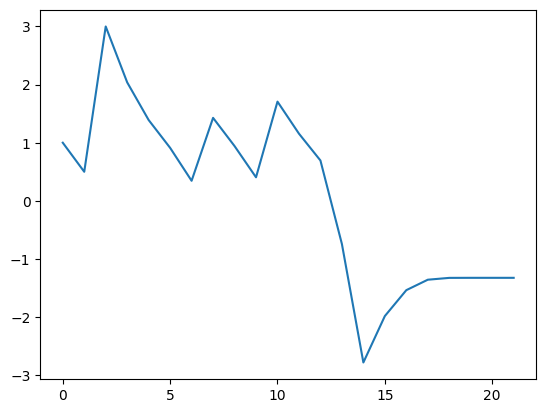

In [9]:
plt.plot(L)

A convergência não se deu de forma suave até a raiz. Houve pontos de distanciamento do valor esperado.

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

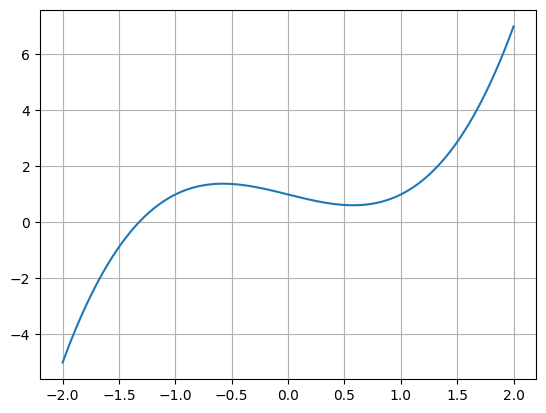

In [10]:
xs = np.linspace(-2, 2, 100)
plt.grid()
plt.plot(xs, poly1(xs))

ax = plt.gca()

In [11]:
l = ax.lines[0]

valores = l.get_ydata()
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

O que você deduz?

O método de Newton não é muito bem comportado para toda escolha de pontos iniciais como o método da bisseção, por ex. Newton pode ficar 'ricocheteando' entre pontos sem nunca chegar na raiz.

## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

Para que $x_i = x_{i+2}$, temos que $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$ e $x_2 = x_0 = x_1 - \frac{f(x_1)}{f'(x_1)}$

consideramos então $y = x_1$ e $x = x_0$

$x = y - (y^3-x+1)/(3y^2-1)$   tal que   $y = (2x^3-1)/(3x^2-1)$

substituindo, temos

$x(3 x^2 - 1) (12 x^6 - 9 x^4 - 12 x^3 + 6 x^2 + 2) = 16 x^9 - 51 x^6 + 27 x^4 + 12 x^3 - 9 x^2 - 1$

Qual o grau deste polinômio?

Grau 9.

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [12]:
def periodo2(x):
    N = 16*x**9-51*x**6+27*x**4+12*x**3-9*x**2-1
    D = x*(3*x**2-1)*(12*x**6-9*x**4-12*x**3+6*x**2+2)
    return D-N

In [13]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

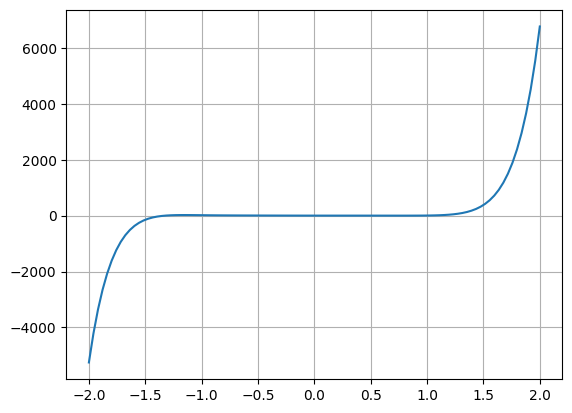

In [14]:
xs = np.linspace(-2, 2, 100)
ys = periodo2(xs)

plt.grid()
plt.plot(xs, ys)

Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

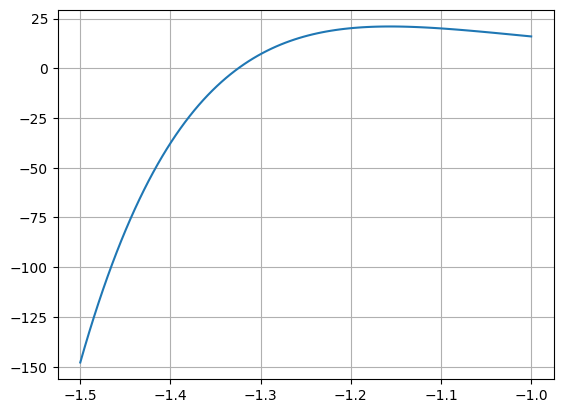

In [15]:
xs = np.linspace(-1.5, -1, 100)
ys = periodo2(xs)

plt.grid()
plt.plot(xs, ys)

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

Esta raiz é a raiz da função $x^3-x+1$. Faz sentido pois, substituindo na formula para achar o próximo ponto, temos $x_1 = x_0$, o que depois resulta em $x_1 = x_2$.

## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [16]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
assert len(L) == 40

Faça um gráfico da convergência dos erros

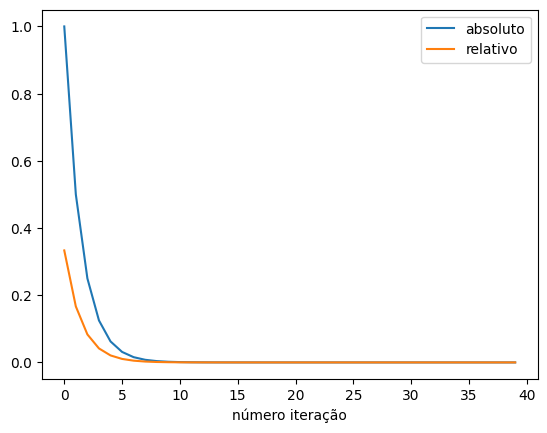

In [17]:
xs = list(range(len(L)))
ys_abs = [abs(L[i]-3) for i in xs]
ys_rel = [abs(L[i]-3)/3 for i in xs]

plt.plot(xs, ys_abs, label="absoluto")
plt.plot(xs, ys_rel, label="relativo")
plt.xlabel("número iteração")
plt.legend()

ax = plt.gca()

In [18]:
l = ax.get_lines()[0]
values = l.get_ydata()

assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

In [19]:
assert len(ax.get_xlabel()) > 5

Qual a velocidade de convergência destas iterações?

Dada uma análise dos valores dos erros, a velocidade de convergência é constante.

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

$y = \frac{x}{2}$, o que explica o resultado acima uma vez que a derivada desta função é $\frac{1}{2}$.